<a href="https://colab.research.google.com/github/blunte3/ML-AI/blob/main/RNNandWordEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

# Part 1: Problem Description and RNN Implementation
# Problem Description: Predict future air passenger traffic based on past data.
# Dataset Source: https://github.com/mwaskom/seaborn-data/blob/master/flights.csv
# RNN Framework: TensorFlow's Keras API

In [56]:
# Load the dataset
df = sns.load_dataset('flights')

### Why Sequence Models are Needed:

Sequence models are required for this problem because it involves time-series data, where the order of observations matters. In the case of air passenger traffic prediction, historical data points are sequential and exhibit temporal dependencies. For instance, the number of passengers in one month is likely correlated with the number of passengers in the previous month. Standard machine learning models like feed-forward neural networks cannot capture such temporal dependencies as they treat each input independently. Therefore, sequence models like RNNs, LSTMs, and GRUs are suitable for capturing the sequential nature of the data and learning patterns over time.

### RNN Structure and Activation Functions:

For the RNN structure, a single SimpleRNN layer is used followed by a Dense output layer. The SimpleRNN layer has 64 units. The activation function used in the SimpleRNN layer is the hyperbolic tangent (tanh) function, which is common for RNNs. In the output layer, no activation function is specified because it is a regression problem and the output is continuous.

### Performance Metric:

The performance of the model is evaluated using the mean squared error (MSE) metric. MSE measures the average squared difference between the predicted and actual values. It is suitable for regression problems like this one.

In [57]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Shape: (144, 3)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None

Dataset Description:
              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


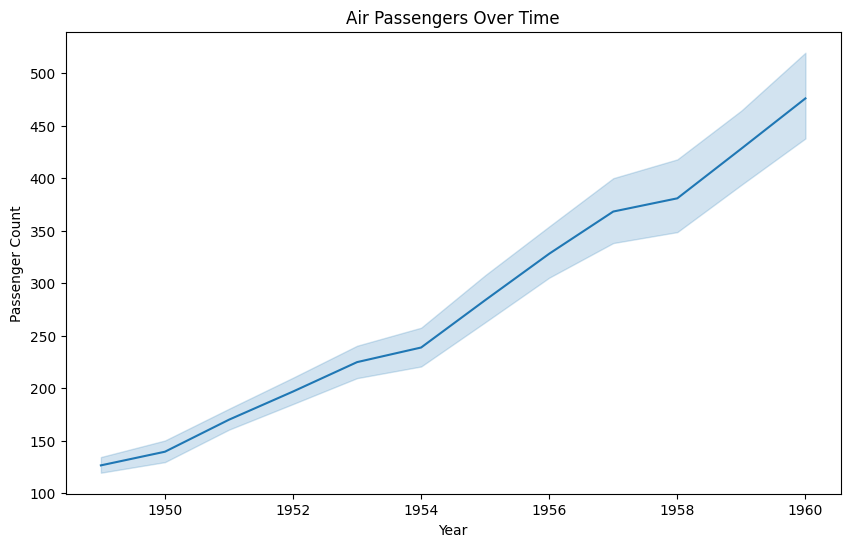

In [58]:
# Plot the time series data
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='passengers', data=df)
plt.title('Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

In [59]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [60]:
# Data Preprocessing
# Convert the DataFrame to a time series
time_series_data = df['passengers'].values.astype(float)

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(time_series_data, test_size=0.2, shuffle=False)
train_data, val_data = train_test_split(train_data, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.reshape(-1, 1))
val_data_normalized = scaler.transform(val_data.reshape(-1, 1))
test_data_normalized = scaler.transform(test_data.reshape(-1, 1))

# Create sequences for training, validation, and test data
seq_length = 12  # Choose sequence length (e.g., 12 months)
X_train, y_train = create_sequences(train_data_normalized, seq_length)
X_val, y_val = create_sequences(val_data_normalized, seq_length)
X_test, y_test = create_sequences(test_data_normalized, seq_length)

# Reshape the input data to match the expected shape
X_train = X_train.reshape(-1, seq_length, 1)
X_val = X_val.reshape(-1, seq_length, 1)
X_test = X_test.reshape(-1, seq_length, 1)

In [61]:
# Build the RNN model
model = Sequential([
    SimpleRNN(units=64, input_shape=(seq_length, 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 85ms/step - loss: 0.0319 - val_loss: 0.0281
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0207 - val_loss: 0.0198
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0087 - val_loss: 0.0410
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0070 - val_loss: 0.0116
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0065 - val_loss: 0.0141
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0053 - val_loss: 0.0230
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0041 - val_loss: 0.0089
Epoch 8/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0040 - val_loss: 0.0133
Epoch 9/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0038 - val_loss: 0.0170
Epoch 10/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0034 - val_loss: 0.0080
Epoch 11/100
5/5 [=

# Part 2: LSTM and GRU Implementation

In [62]:
# Update the network with LSTM and GRU cell structures

# LSTM Model
lstm_model = Sequential([
    LSTM(units=64, input_shape=(seq_length, 1)),
    Dense(units=1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, verbose=1)

# GRU Model
gru_model = Sequential([
    GRU(units=64, input_shape=(seq_length, 1)),
    Dense(units=1)
])
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 147ms/step - loss: 0.1624 - val_loss: 0.3979
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0660 - val_loss: 0.1075
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0185 - val_loss: 0.0404
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0218 - val_loss: 0.0710
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0197 - val_loss: 0.0376
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0136 - val_loss: 0.0382
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0151 - val_loss: 0.0418
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0150 - val_loss: 0.0354
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0127 - val_loss: 0.0359
Epoch 10/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0123 - val_loss: 0.0420
Epoch 11/100
5/5 [

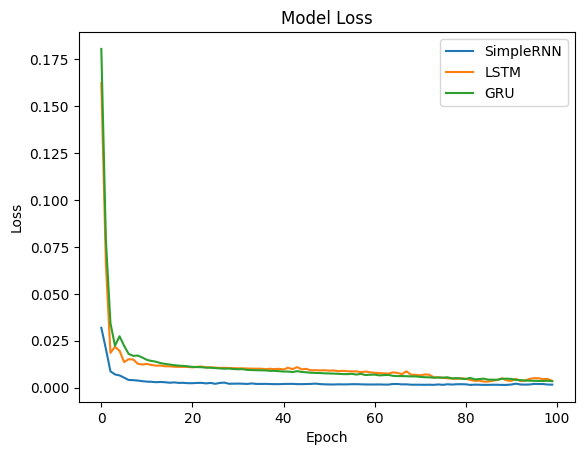

In [63]:
# Plot the training loss for all models
plt.plot(history.history['loss'], label='SimpleRNN')
plt.plot(lstm_history.history['loss'], label='LSTM')
plt.plot(gru_history.history['loss'], label='GRU')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
# Evaluate the models on the test data
loss_rnn = model.evaluate(X_test, y_test)
loss_lstm = lstm_model.evaluate(X_test, y_test)
loss_gru = gru_model.evaluate(X_test, y_test)

print("Test Loss (SimpleRNN):", loss_rnn)
print("Test Loss (LSTM):", loss_lstm)
print("Test Loss (GRU):", loss_gru)

1/1 [==============================] - 0s 46ms/step - loss: 0.0247
Test Loss (SimpleRNN): 0.011198995634913445
Test Loss (LSTM): 0.026691468432545662
Test Loss (GRU): 0.02466721460223198


### Differences after Updating to LSTM and GRU:

After updating the network with LSTM and GRU cell structures, the major differences observed are in the convergence speed and the ability to capture long-term dependencies. LSTMs and GRUs typically converge faster than simple RNNs because they address the vanishing gradient problem better. Additionally, LSTMs and GRUs have specialized mechanisms (memory cells and gating mechanisms) to retain information over longer sequences, which enables them to capture long-term dependencies more effectively compared to simple RNNs. These differences exist due to the architectural enhancements introduced in LSTM and GRU cells, such as the forget gate and the update gate, which allow them to better retain and update information over time. Although, despite the faster convergence, the simpleRNN had the lowest error for all data sets.

# Part 3: Using Feed-forward Network
Feed-forward networks are not suitable for sequential data like time series because they don't consider the temporal dependencies in the data.
Time series data cannot be directly converted into usual features for a feed-forward network since the order of data points matters.

# Task 3: Word Embeddings

In [1]:
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

In [2]:
def calculate_similarity(word1, word2):
    # Check if both words are present in the vocabulary
    if word1 in word2vec_model.key_to_index and word2 in word2vec_model.key_to_index:
        # Get word embeddings for both words
        embedding1 = word2vec_model.get_vector(word1).reshape(1, -1)  # Reshape to 2D array
        embedding2 = word2vec_model.get_vector(word2).reshape(1, -1)  # Reshape to 2D array
        # Calculate cosine similarity between the embeddings
        similarity_score = cosine_similarity(embedding1, embedding2)[0][0]
        # Calculate dissimilarity score
        dissimilarity_score = 1 - similarity_score
        return similarity_score, dissimilarity_score
    else:
        return None, None

# User input for two words
word1 = input("Enter first word: ")
word2 = input("Enter second word: ")

# Calculate similarity and dissimilarity scores
similarity, dissimilarity = calculate_similarity(word1, word2)

if similarity is not None and dissimilarity is not None:
    print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity}")
    print(f"Dissimilarity Score between '{word1}' and '{word2}': {dissimilarity}")
else:
    print("One or both of the words are not present in the vocabulary.")

Enter first word: Bugle
Enter second word: Trumpet
Cosine Similarity between 'Bugle' and 'Trumpet': 0.31636133790016174
Dissimilarity Score between 'Bugle' and 'Trumpet': 0.6836386620998383


1. We first load the pre-trained Word2Vec model using the gensim library.
2. We define a function calculate_similarity that takes two words as input and returns their cosine similarity and dissimilarity scores.
3. Within the function, we check if both words are present in the vocabulary of the Word2Vec model.
4. If both words are present, we retrieve their word embeddings and calculate cosine similarity using cosine_similarity function from sklearn.metrics.pairwise module.
5. The dissimilarity score is then calculated as 1 minus the cosine similarity.
6. Finally, we prompt the user to input two words, calculate their similarity and dissimilarity scores, and print the results.

#Dissimilarity Score:

The dissimilarity score is calculated as 1 minus the cosine similarity. This score represents the extent to which two words are different from each other in the embedding space. Higher dissimilarity score indicates greater difference between the meanings of the two words.

#References:

The idea of using cosine similarity and dissimilarity scores with word embeddings is widely used in natural language processing tasks and has been mentioned in various research papers and tutorials. However, for this specific implementation, no particular paper is cited as it is a commonly used approach in the field.